#### Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import (GridSearchCV, train_test_split,)

#### Load the dataset

In [ ]:
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y = True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Grid Search

In [ ]:
gbm = GradientBoostingClassifier(random_state=0)

param_grid = dict(
    n_estimators=[10, 20, 50, 100],
    min_samples_split=[0.1, 0.3, 0.5],
    max_depth=[1,2,3,4, None],
)

print('Number of hyperparameters combinations: ',
      len(param_grid['n_estimators'])
      *len(param_grid['min_samples_split'])
      *len(param_grid['max_depth']))

Number of hyperparameters combinations:  60


In [ ]:
search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=5, refit=True)
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, None],
                         'min_samples_split': [0.1, 0.3, 0.5],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='roc_auc')

In [ ]:
search.best_params_

{'max_depth': 4, 'min_samples_split': 0.5, 'n_estimators': 100}

In [ ]:
results = pd.DataFrame(search.cv_results_)

results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.055322,0.018841,0.016452,0.006811,1,0.1,10,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.992333,0.946667,0.984333,0.969310,0.990136,0.976556,0.016969,48
1,0.109507,0.016759,0.011809,0.001729,1,0.1,20,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.994000,0.943333,0.988333,0.968276,0.991156,0.977020,0.019118,45
2,0.118013,0.007229,0.005756,0.000485,1,0.1,50,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.998000,0.951333,0.994667,0.982759,0.996599,0.984671,0.017521,23
3,0.215658,0.011690,0.005475,0.000428,1,0.1,100,"{'max_depth': 1, 'min_samples_split': 0.1, 'n_...",0.998667,0.961333,0.997333,0.983793,0.995238,0.987273,0.013996,11
4,0.026969,0.003547,0.005148,0.000845,1,0.3,10,"{'max_depth': 1, 'min_samples_split': 0.3, 'n_...",0.992333,0.946667,0.984333,0.969310,0.990136,0.976556,0.016969,48


In [ ]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results[['param_max_depth', 'param_min_samples_split', 'param_n_estimators', 'mean_test_score', 'std_test_score',]].head()

,param_max_depth,param_min_samples_split,param_n_estimators,mean_test_score,std_test_score
0,4,0.5,100,0.989599,0.009038
1,3,0.1,100,0.989335,0.008312
2,3,0.3,100,0.988549,0.010320
3,3,0.5,100,0.988400,0.010708
4,2,0.1,100,0.987866,0.013103


Text(0.5, 0, 'Hyperparameter combinations')

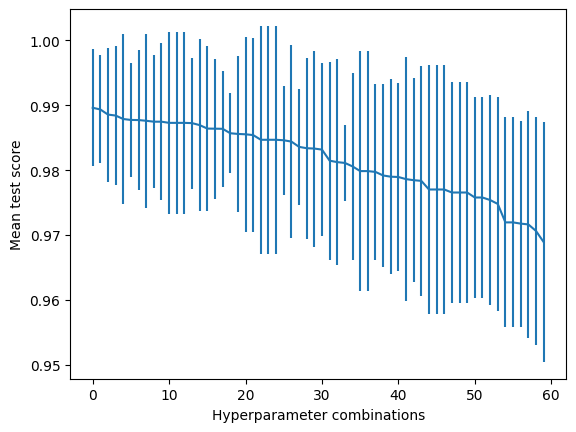

In [ ]:
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

In [ ]:
X_train_preds = search.predict_proba(X_train)[:, 1]
X_test_preds = search.predict_proba(X_test)[:, 1]

print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))

Train roc_auc:  1.0
Test roc_auc:  0.9950029394473839


In [ ]:
def summarize_by_param(hparam):

  tmp = pd.concat([
      results.groupby(hparam)['mean_test_score'].mean(),
      results.groupby(hparam)['mean_test_score'].std(),
  ], axis=1)

  tmp.columns = ['mean_test_score', 'std_test_score']

  return tmp

In [ ]:
tmp = summarize_by_param('param_n_estimators')

tmp.head()

,mean_test_score,std_test_score
param_n_estimators,,
10,0.974468,0.003142
20,0.979620,0.002064
50,0.985388,0.001209
100,0.987266,0.002046


Text(0, 0.5, 'roc-auc')

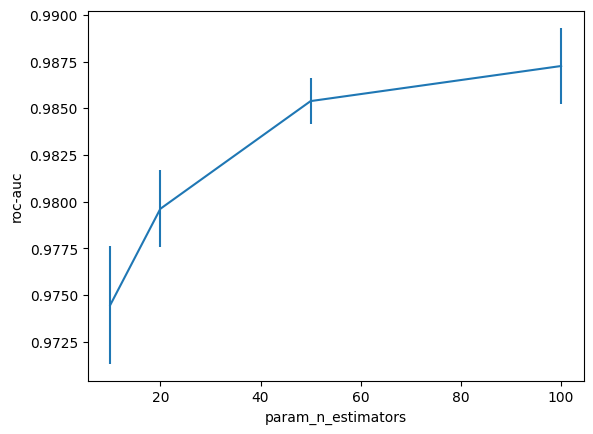

In [ ]:
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')


Text(0, 0.5, 'roc-auc')

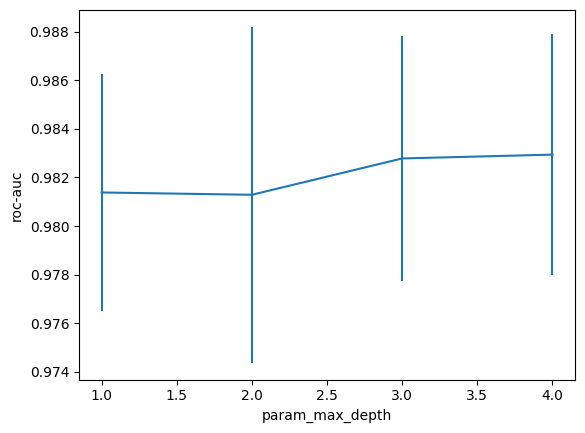

In [ ]:
tmp = summarize_by_param('param_max_depth')
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')

Text(0, 0.5, 'roc-auc')

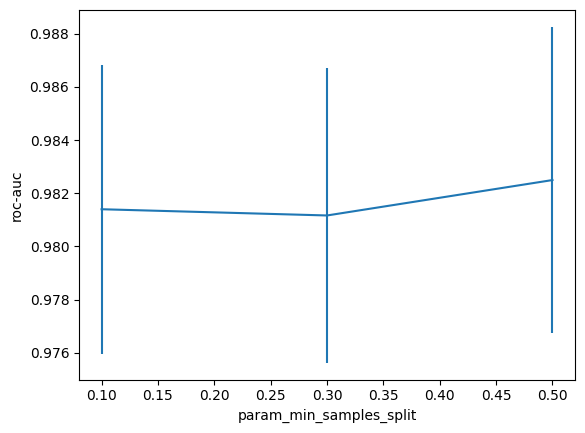

In [ ]:
tmp = summarize_by_param('param_min_samples_split')
tmp['mean_test_score'].plot(yerr=[tmp['std_test_score'], tmp['std_test_score']], subplots=True)
plt.ylabel('roc-auc')

In [ ]:
param_grid = dict(
    n_estimators=[60, 80, 100, 120],
    max_depth=[2,3],
    loss=['deviance', 'exponential']
)

search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=5, refit=True)

search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
 

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'loss': ['deviance', 'exponential'],
                         'max_depth': [2, 3],
                         'n_estimators': [60, 80, 100, 120]},
             scoring='roc_auc')

In [ ]:
search.best_params_

{'loss': 'deviance', 'max_depth': 3, 'n_estimators': 120}

In [ ]:
results = pd.DataFrame(search.cv_results_)
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results[['param_max_depth', 'param_loss', 'param_n_estimators', 'mean_test_score', 'std_test_score',]].head()

,param_max_depth,param_loss,param_n_estimators,mean_test_score,std_test_score
0,3,deviance,120,0.989210,0.008980
1,2,exponential,120,0.988944,0.011160
2,2,exponential,100,0.988271,0.011859
3,2,exponential,80,0.988266,0.010938
4,2,deviance,80,0.988000,0.012510


Text(0.5, 0, 'Hyperparameter combinations')

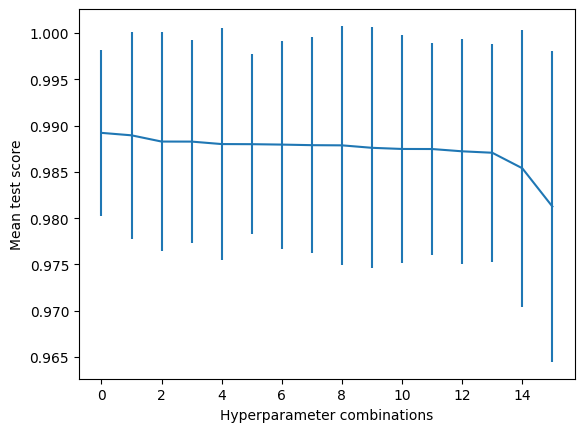

In [ ]:
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean test score')
plt.xlabel('Hyperparameter combinations')

In [ ]:
X_train_preds = search.predict_proba(X_train)[:, 1]
X_test_preds = search.predict_proba(X_test)[:, 1]

print('Train roc_auc: ', roc_auc_score(y_train, X_train_preds))
print('Test roc_auc: ', roc_auc_score(y_test, X_test_preds))

Train roc_auc:  1.0
Test roc_auc:  0.9951499118165785
